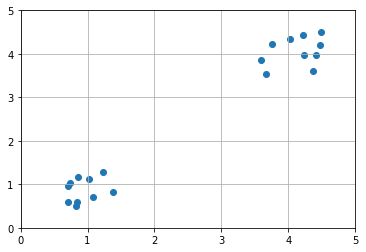

Text(0,0.5,'y')

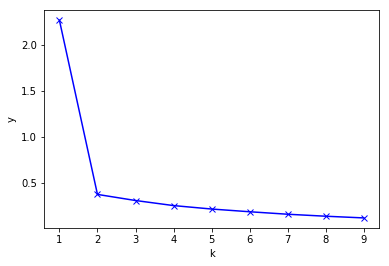

In [14]:
import numpy as np
import matplotlib.pyplot as plt
cluster1 = np.random.uniform(0.5,1.5,(2,10))
cluster2 = np.random.uniform(3.5,4.5,(2,10))
X = np.hstack((cluster1,cluster2)).T
plt.figure()
plt.axis([0,5,0,5])
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist#cdist用于求解距离
K = range(1,10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('y')

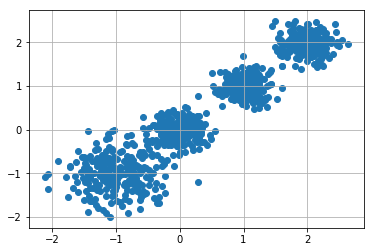

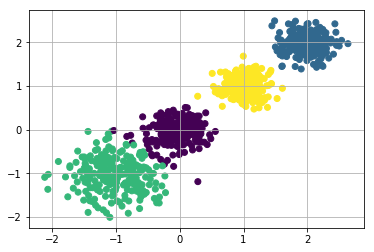

5924.050613480169

In [24]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.grid(True)
plt.show()

from sklearn import metrics#用Calinski-Harabasz Index评估的聚类分数,越高越好
metrics.calinski_harabaz_score(X, y_pred) 

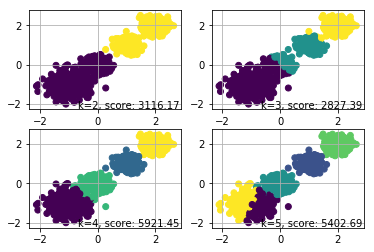

In [23]:
from sklearn.cluster import MiniBatchKMeans#计算过程中不必使用所有的数据样本，而是从不同类别的样本中抽取一部分样本来代表各自类型进行计算。
for index, k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size = 200, random_state=9).fit_predict(X)
    score= metrics.calinski_harabaz_score(X, y_pred)  
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.grid(True)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')

plt.show()